In [1]:
import numpy as np
import pandas as pd 
import math
from pandas.core.frame import DataFrame

# Q1

In [2]:

data=pd.read_csv('data challenge 2.csv',sep=',')
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

# Q2

In [4]:
## Histogram
data_q2=data.copy()
# data_q2['transactionAmount']=data_q2['transactionAmount'].apply(np.log1p)
# print(data_q2['transactionAmount'])
data_q2['transactionAmount']=data_q2[data_q2['transactionAmount']!=0]['transactionAmount']
# clean the data where transaction amount = 0
data_q2['transactionAmount']=data_q2['transactionAmount'].apply(np.log1p)
data_q2['transactionAmount'].describe()

count    764138.000000
mean          4.368396
std           1.234293
min           0.009950
25%           3.647797
50%           4.534909
75%           5.282124
max           7.607153
Name: transactionAmount, dtype: float64

/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


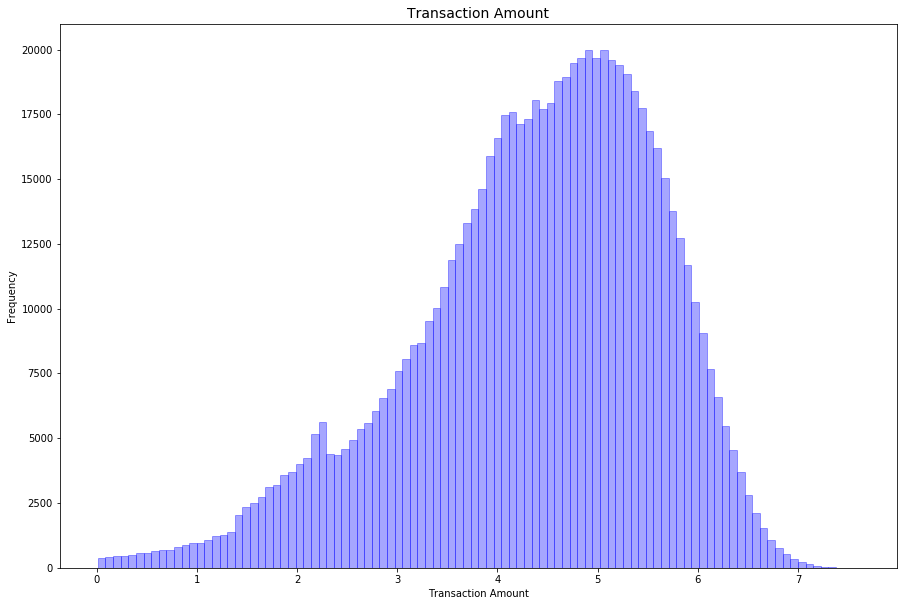

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
fig = plt.figure(figsize=(15,10))
plt.hist(data_q2['transactionAmount'],bins=100,facecolor='blue', edgecolor='blue',alpha=0.35)
plt.title('Transaction Amount',fontsize=14)
plt.xlabel('Transaction Amount',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

plt.show()

In [6]:
#Hypothesis

In [7]:
import scipy
from scipy.stats import f
import scipy.stats as stats
print(stats.anderson(data_q2['transactionAmount'], dist='norm'))

AndersonResult(statistic=nan, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


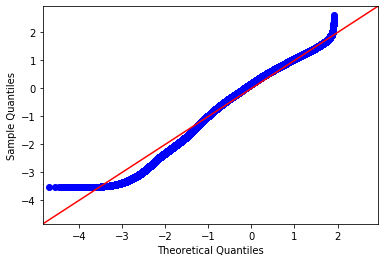

In [8]:
import statsmodels.api as sm
import pylab
x_test = data_q2['transactionAmount']
mean_x=np.mean(x_test)
sd_x=np.std(x_test)
z = (x_test-mean_x)/sd_x
sm.qqplot(z, line='45')
pylab.show()

# Q3

In [9]:
#identify multiple swipe 
data_q3=data.copy()
grouped = data_q3.groupby(['cardCVV','enteredCVV','cardLast4Digits'])
grouped.count()



accountNumber  customerId  creditLimit  \
cardCVV enteredCVV cardLast4Digits                                           
100     100        179                         39          39           39   
                   787                          6           6            6   
                   838                         21          21           21   
                   1280                        34          34           34   
                   1344                        30          30           30   
...                                           ...         ...          ...   
998     998        6947                        28          28           28   
                   6966                       227         227          227   
                   7461                        90          90           90   
                   8340                        24          24           24   
                   8622                        12          12           12   

                                    availableMoney  transactionDateTime  \
cardCVV enteredCVV cardLast4Digits                                        
100     100        179                          39                   39   
                   787                           6                    6   
                   838                          21                   21   
                   1280                         34                   34   
                   1344                         30                   30   
...                                            ...                  ...   
998     998        6947                         28                   28   
                   6966                        227                  227   
                   7461                         90                   90   
                   8340                         24                   24   
                   8622                         12                   12   

                                    transactionAmount  merchantName  \
cardCVV enteredCVV cardLast4Digits                                    
100     100        179                             39            39   
                   787                              6             6   
                   838                             21            21   
                   1280                            34            34   
                   1344                            30            30   
...                                               ...           ...   
998     998        6947                            28            28   
                   6966                           227           227   
                   7461                            90            90   
                   8340                            24            24   
                   8622                            12            12   

                                    acqCountry  merchantCountryCode  \
cardCVV enteredCVV cardLast4Digits                                    
100     100        179                      39                   39   
                   787                       6                    6   
                   838                      21                   21   
                   1280                     32                   33   
                   1344                     30                   30   
...                                        ...                  ...   
998     998        6947                     28                   28   
                   6966                    225                  226   
                   7461                     90                   90   
                   8340                     24                   24   
                   8622                     12                   12   

                                    posEntryMode  ...  echoBuffer  \
cardCVV enteredCVV cardLast4Digits                ...               
100     100        179                        39  ...      

In [10]:
grouped.sum()

accountNumber    customerId  creditLimit  \
cardCVV enteredCVV cardLast4Digits                                             
100     100        179                34454241198   34454241198        39000   
                   787                 2102105508    2102105508       120000   
                   838                19767368187   19767368187         5250   
                   1280                5328682198    5328682198      1700000   
                   1344               23966268780   23966268780       300000   
...                                           ...           ...          ...   
998     998        6947                3602455472    3602455472       210000   
                   6966              108756555563  108756555563      3405000   
                   7461               14172999300   14172999300       900000   
                   8340               17100505176   17100505176       360000   
                   8622               11525171604   11525171604        60000   

                                    availableMoney  transactionAmount  \
cardCVV enteredCVV cardLast4Digits                                      
100     100        179                    22012.12            1374.02   
                   787                   118596.25             544.99   
                   838                     2637.72            2069.12   
                   1280                 1578978.28            4026.86   
                   1344                  296789.02            3074.87   
...                                            ...                ...   
998     998        6947                  153345.22            2943.68   
                   6966                 1305944.74           33984.76   
                   7461                  469032.60            9635.72   
                   8340                  354606.73            1753.45   
                   8622                   52130.70            1067.92   

                                    posEntryMode  posConditionCode  \
cardCVV enteredCVV cardLast4Digits                                   
100     100        179                     248.0              46.0   
                   787                     124.0              13.0   
                   838                     185.0              42.0   
                   1280                    215.0              90.0   
                   1344                    224.0             100.0   
...                                          ...               ...   
998     998        6947                    103.0              49.0   
                   6966                   2288.0             752.0   
                   7461                    828.0             188.0   
                   8340                    206.0              66.0   
                   8622                     87.0              12.0   

                                    echoBuffer  currentBalance  merchantCity  \
cardCVV enteredCVV cardLast4Digits                                             
100     100        179                     0.0        16987.88           0.0   
                   787                     0.0         1403.75           0.0   
                   838                     0.0         2612.28           0.0   
                   1280                    0.0       121021.72           0.0   
                   1344                    0.0         3210.98           0.0   
...                                        ...             ...           ...   
998     998        6947                    0.0        56654.78           0.0   
                   6966                    0.0      2099055.26           0.0   
                   7461                    0.0       430967.40           0.0   
                   8340                    0.0         5393.27           0.0   
                   8622                    0.0         7869.30           0.0   

                                    merchantState  merchantZip  posOnPremises  \
cardCVV ente

In [11]:
#reversed transactions
reverse=data_q3[data_q3['transactionType']=='REVERSAL']['transactionType']
reverse_amount=data_q3[data_q3['transactionType']=='REVERSAL']['transactionAmount']
print ('There are',reverse.count(),'types of reversed transactions, and $',sum(reverse_amount),'be reversed')


There are 20303 types of reversed transactions, and $ 2821792.4999999753 be reversed


# Q4

In [82]:
data_q4 = data.copy()
data_q4 = data_q4.dropna(axis=1,how='all')
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [83]:
#output the data_q4
data_q4_name=['accountNumber', 'customerId', 'creditLimit', 'availableMoney','transactionDateTime','transactionAmount',
                          'merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode',
                          'currentExpDate','accountOpenDate','dateOfLastAddressChange','cardCVV','enteredCVV','cardLast4Digits',
                          'transactionType','currentBalance','cardPresent','expirationDateKeyInMatch','isFraud']
output_green=pd.DataFrame(columns=data_q4_name,data=data_q4)
output_green.to_csv('data_q4_data.csv',encoding='utf-8',index=False)
#output the data_q4

In [99]:
data_q4=pd.read_csv('data_q4_data(encoding).csv',sep=',')
data_q4 = data_q4.drop(columns=['accountNumber','customerId','cardCVV','enteredCVV','cardLast4Digits','transactionDateTime', 'merchantName','acqCountry','merchantName','merchantCountryCode',
                          'merchantCategoryCode','currentExpDate','accountOpenDate','dateOfLastAddressChange',
                          'transactionType','cardPresent','expirationDateKeyInMatch','isFraud'])
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   creditLimit                     786363 non-null  int64  
 1   availableMoney                  786363 non-null  float64
 2   transactionAmount               786363 non-null  float64
 3   acqCountryisUS                  786363 non-null  int64  
 4   acqCountryisCAN                 786363 non-null  int64  
 5   acqCountryisMEX                 786363 non-null  int64  
 6   acqCountryisPR                  786363 non-null  int64  
 7   merchantCountryCodeisUS         786363 non-null  int64  
 8   merchantCountryCodeisCAN        786363 non-null  int64  
 9   merchantCountryCodeisMEX        786363 non-null  int64  
 10  merchantCountryCodeisPR         786363 non-null  int64  
 11  posEntryMode                    786363 non-null  int64  
 12  posConditionCode

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE

In [101]:
X=data_q4.iloc[:,:-1]
y=data_q4.iloc[:,17:18]
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#resample
sm = SMOTE(random_state=42)
X_resample,y_resample = sm.fit_sample(X_train,y_train)


# Instantiate lr
lr = LogisticRegression()
lr.fit(X_resample, y_resample)       
# Predict y_pred
y_pred = lr.predict(X_test)   
# Calculate accuracy
accuracy = accuracy_score(y_pred, y_test)
# Evaluate lr's accuracy on the test set
print('{:s} : {:.3f}'.format('Logistic Regression', accuracy)) 
# Evalutate MSE
print('MSE test: %.3f' % (mean_squared_error(y_test, y_pred)))
# Evalutate R^2
# print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))
print("-------------------------------------------")

Logistic Regression : 0.946
MSE test: 0.054
-------------------------------------------


/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [102]:
# Create the hyperparameter grid
c_space = np.linspace(1,20,num = 20)
param_grid = {'C': c_space}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=10)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Tuned Logistic Regression Parameter: {'C': 6.0}
Tuned Logistic Regression Accuracy: 0.9987301392006322


/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [103]:
best_logreg=LogisticRegression(C=6,solver='lbfgs')
best_logreg.fit(X_train,y_train)
y_pred=best_logreg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_pred, y_test) 
print('{:s} : {:.3f}'.format("LogisticRegressor Accuracy", accuracy)) 

LogisticRegressor Accuracy : 0.999


/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235568
           1       0.00      0.00      0.00       341

    accuracy                           1.00    235909
   macro avg       0.50      0.50      0.50    235909
weighted avg       1.00      1.00      1.00    235909



/Users/wanrongcai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
